In [54]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets

# データセットの読み込み
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# 主成分分析前のサイズを出力
X.shape

(150, 4)

In [55]:
### 主成分分析による次元削減

# 共分散行列を求める
m = np.cov(X, rowvar=0, bias=1)#標本分散
# X_bar = np.array([row - np.mean(row) for row in X.transpose()]).transpose()
# m = np.dot(X_bar.T, X_bar) / X.shape[0]

# 固有値問題を解く
(w, v) = np.linalg.eig(m)
v = v.T

# 固有値の大きい順に固有値と固有ベクトルをソート
tmp = {}
for i, value in enumerate(w):
	tmp[value] = i

v_sorted = []
for key in sorted(tmp.keys(), reverse=True):
	v_sorted.append(v[tmp[key]])
v_sorted = np.array(v_sorted)

# 次元削減
dim = 2
components = v_sorted[:dim,]
print(components.shape)
X_pca = np.dot(X_bar, components.T)

# 主成分分析後のサイズ
X_pca.shape


(2, 4)


(150, 2)

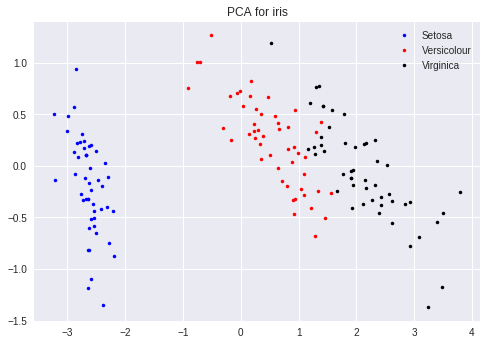

In [56]:
# 可視化
s  = np.array([x for i, x in enumerate(X_pca) if Y[i] == 0])
ve = np.array([x for i, x in enumerate(X_pca) if Y[i] == 1])
vi = np.array([x for i, x in enumerate(X_pca) if Y[i] == 2])

colors = ['b.', 'r.', 'k.']
fig, ax = plt.subplots()
ax.plot(s[:,0],  s[:,1],  'b.', label='Setosa')
ax.plot(ve[:,0], ve[:,1], 'r.', label='Versicolour')
ax.plot(vi[:,0], vi[:,1], 'k.', label='Virginica')

ax.set_title("PCA for iris")
ax.legend(numpoints=1)

plt.show()